<a href="https://colab.research.google.com/github/yuki86/robotica/blob/master/exercicio_10-09-20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# aula_10-09-20


Exercícios

Faça um programa de tratamento de imagem que analise o picos de
imagem e determine a partir deles as posições x e y na imagem de
tons de cinza.

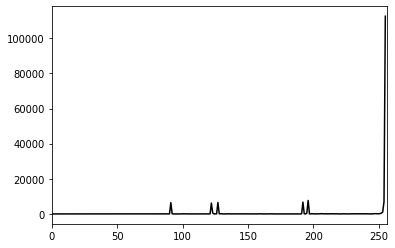

91 	 6392 	 -6336
122 	 6163 	 -5620
127 	 6505 	 -6441
192 	 6628 	 -6637
196 	 7223 	 -7614


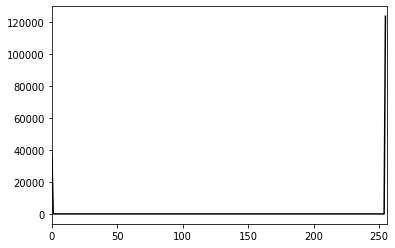

92
123
128
193
197
0 	 thresh:  92
 xmin:  56 	 xmax:  140
 ymin:  32 	 ymax:  126
1 	 thresh:  123
 xmin:  73 	 xmax:  166
 ymin:  205 	 ymax:  297
2 	 thresh:  128
 xmin:  55 	 xmax:  377
 ymin:  29 	 ymax:  280
3 	 thresh:  193
 xmin:  64 	 xmax:  318
 ymin:  111 	 ymax:  369
4 	 thresh:  197
 xmin:  63 	 xmax:  302
 ymin:  28 	 ymax:  297


In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

def histograma_color( img,filename):
  color = ('b','g','r')
  for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
  plt.savefig(filename)
  plt.show()
  return histr

def histograma_gray( img,filename):
    histr = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.plot(histr,color = (0,0,0))
    plt.xlim([0,256])
    plt.savefig(filename)
    plt.show()
    return histr

def GaussianBlur_imagem(img, delta_x, delta_y):
    imagem = cv2.GaussianBlur(img,(delta_x,delta_y),0) 
    return imagem


arquivo_original = "circulos"
extensao = ".jpg"
tipo = "_grayscale_"
imagem = cv2.imread(arquivo_original+extensao)
altura,largura,bytesPorPixel = np.shape(imagem)

img_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([img_gray],[0],None,[256],[0,256])

delta_x = 3
delta_y = 3

img_gray_gauss = GaussianBlur_imagem(img_gray , delta_x, delta_y)
histogram = histograma_gray( img_gray_gauss, arquivo_original + tipo + str(delta_x*delta_y) +"_histograma_"+extensao)
cv2.imwrite(arquivo_original + tipo + str(delta_x*delta_y) + extensao, img_gray_gauss )

#for i in range(0,255):
#    print(i, "\t",int(histogram[i]),end="\n")

list_thresh = [0]

histogram_derivative = [0]*254
for i in range (0,253):
    pto_mais = histogram[i+1] - histogram[i]
    pto_menos = histogram[i+2] - histogram[i+1]
    if (( pto_mais>0 ) and (pto_menos<0 )) and (pto_mais >100):
        print ( int(i+1),"\t", int(pto_mais),"\t", int(pto_menos) ,end ="\n")
        list_thresh.append(int(i+2))
        thres_level = int(i+2)

list_thresh.remove(0)
thres_max = int(255)

ret,thres = cv2.threshold( img_gray_gauss, thres_level, thres_max, cv2.THRESH_BINARY) 
histograma_gray( thres, arquivo_original + tipo +"Final_" +"_LEVEL_"+str(thres_level)+"_histograma_"+extensao)
cv2.imwrite(arquivo_original + tipo + "Final_"  +"_LEVEL_"+str(thres_level) + extensao, thres )

for i in list_thresh:
    if (i >0):
        print(i,end="\n")

list_objeto = np.zeros([len(list_thresh),5])
for idx in range(0,len( list_thresh ) ):
    list_objeto[idx][1] = largura
    list_objeto[idx][2] = 0
    list_objeto[idx][3] = altura
    list_objeto[idx][4] = 0
    
for py in range(0,altura):
    for px in range(0,largura):
        for idx in range(0, len( list_thresh ) ):
            if ( img_gray_gauss[py][px] == list_thresh[idx]):
                #print( "color=",int(img_gray_gauss[py][px]),"\ty= ",int(py),"\tx= ",int(px), end="\n")
                list_objeto[idx][0] = list_thresh[idx]
                if list_objeto[idx][1] > px:
                    list_objeto[idx][1] = px
                if list_objeto[idx][2] < px:
                    list_objeto[idx][2] = px
                if list_objeto[idx][3] > py:
                    list_objeto[idx][3] = py
                if list_objeto[idx][4] < py:
                    list_objeto[idx][4] = py
                
for idx in range(0,len( list_thresh ) ):
    print( int(idx), "\t thresh: ",int(list_objeto[idx][0]),end="\n")
    print(" xmin: ",int( list_objeto[idx][1]),"\t xmax: ",int( list_objeto[idx][2] ), end="\n")
    print(" ymin: ",int( list_objeto[idx][3]),"\t ymax: ",int( list_objeto[idx][4] ), end="\n")


Exercício 2


Faça um programa de tratamento de imagem que analise o picos de
imagem e determine a partir deles as posições xmin, xmax, ymin e
ymax na imagem de tons de cinza.

In [14]:
from google.colab.patches import cv2_imshow


for py in range(0,altura):
    for px in range(0,largura):
        for idx in range(0, len( list_thresh ) ):
            if ( img_gray_gauss[py][px] == list_thresh[idx]):
                #print( "color=",int(img_gray_gauss[py][px]),"\ty= ",int(py),"\tx= ",int(px), end="\n")
                list_objeto[idx][0] = list_thresh[idx]
                if list_objeto[idx][1] > px:
                    list_objeto[idx][1] = px
                if list_objeto[idx][2] < px:
                    list_objeto[idx][2] = px
                if list_objeto[idx][3] > py:
                    list_objeto[idx][3] = py
                if list_objeto[idx][4] < py:
                    list_objeto[idx][4] = py

xmin = largura
xmax = 0
thresh = 91

if xmin>px:
  xmin=px
if xmax>px:
  xmax=px

print(" xmin: ")
print(" xmax: ")

cv2_imshow("Gray")
cv2.waitKey()
cv2.destroyWindow("Gray")

 xmin: 
 xmax: 


AttributeError: ignored